# Hyperfine beat and (electronic) alignment modelling

From prior work and data:

- Forbes, R. et al. (2018) ‘Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV’, Physical Review A, 97(6), p. 063417. Available at: https://doi.org/10.1103/PhysRevA.97.063417. arXiv: http://arxiv.org/abs/1803.01081, Authorea (original HTML version): https://doi.org/10.22541/au.156045380.07795038
- Data (OSF): https://osf.io/ds8mk/
- [Quantum Metrology with Photoelectrons (Github repo)](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons), particularly the [Alignment 3 notebook](https://github.com/phockett/Quantum-Metrology-with-Photoelectrons/blob/master/Alignment/Alignment-3.ipynb). Functions from this notebook have been incorporated in the current project, under `qbanalysis.hyperfine`.

## Formalism

In many physical processes, multiple eigenstates of the system are populated. This may be the result of thermal effects, in which case the states are incoherent, or via a coherent preparation process. In the latter case, the overall state of the system can be considered as a wavepacket, and will evolve in time. Assuming that the wavepacket is created “instantaneously” (with respect to the timescale of system/wavepacket evolution), such as via photon-absorption from a short laser pulse, then the ensuing dynamics is simply dependent on the phase-evolution of the eigenstates which form the superposition state.

A textbook example is the preparation of a superposition of hyperfine states in rare gas atoms via photo-absorption. Typically, a small number of hyperfine states are prepared, and their evolution results in relatively simple wavepacket behaviour, exhibiting clear quantum beats, correlated with a changing alignment of the charge distribution. A full treatment can be found in Sect. 4.7 of Blum's book [1].

For the case of quantum beats from a manifold of (hyperfine) states,
the state multipoles can be expressed as a product of an initial
state, and time-dependent coefficients, as per Eqns. 4.131 and 4.134
in Blum [1]:

\begin{equation}
\langle T(J;t)_{KQ}^{\dagger} \rangle =G(J;t)_{K}\langle T(J)_{KQ}^{\dagger}\rangle
\end{equation}

where

\begin{equation}
G(J;t)_{K}=\frac{1}{2I+1}\sum_{F',F}(2F'+1)(2F+1)\left\{ \begin{array}{ccc}
J & F' & I\\
F & J & K
\end{array}\right\} ^{2}\cos\left[\frac{(E_{F'}-E_{F})t}{\hbar}\right]
\end{equation}

and $\{...\}$ is a $6j$ symbol, $J$ is the electronic angular momentum,
$I$ the nuclear spin and $F,\,F'$ are hyperfine states that comprise the superposition (wavepacket).

Hence, $\langle T(J)_{KQ}^{\dagger}\rangle$ defines the initial state
of the system after preparation (defined by the state multipoles), and the time-evolution of the superposition
is given by $G(J;t)_{K}$. This contains the angular momentum coupling
between the hyperfine states (defined by the $6j$ symbol), and the
relative phase evolution of the states, expressed in terms of their
energy differences.

***
**References**

[1] Blum, K. (2012). Density Matrix Theory and Applications (3rd Editio, Vol. 64). Berlin, Heidelberg: Springer Berlin Heidelberg. https://doi.org/10.1007/978-3-642-20561-3

[2] Zare, R. N. (1988). Angular Momentum: Understanding spatial aspects in chemistry and physics. John Wiley & Sons.

[3] Hockett, P. (2018). Quantum Metrology with Photoelectrons, Volume 1 Foundations. IOP Publishing. https://doi.org/10.1088/978-1-6817-4684-5 (See also links at top of document.)

[4] Forbes, R., Makhija, V., Underwood, J. G., Stolow, A., Wilkinson, I., Hockett, P., & Lausten, R. (2018). Quantum-beat photoelectron-imaging spectroscopy of Xe in the VUV. Physical Review A, 97(6), 063417. https://doi.org/10.1103/PhysRevA.97.063417; also [arXiv 1803.01081](http://arxiv.org/abs/1803.01081); and [web version on authorea](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv).

[5] Fano, U., & Macek, J. H. (1973). Impact Excitation and Polarization of the Emitted Light. Reviews of Modern Physics, 45(4), 553–573. https://doi.org/10.1103/RevModPhys.45.553

***

In [1]:
from qbanalysis.hyperfine import *
import numpy as np


2024-06-06 15:19:56.480 | INFO     | qbanalysis.config:<module>:11 - PROJ_ROOT path is: /home/jovyan/code-share/github-share/Quantum-Beat_Photoelectron-Imaging_Spectroscopy_of_Xe_in_the_VUV


## Example: Xe dynamics & alignment ##

Here two examples are given, following the [work in ref. [4]](https://www.authorea.com/users/71114/articles/188337-quantum-beat-photoelectron-imaging-spectroscopy-of-xe-in-the-vuv), in which hyperfine wavepackets were prepared in Xe via excitation around 133 nm. Distinct wavepackets are created in the $^{129}Xe$ and $^{131}Xe$ isotopes, which have $I_{129}=1/2$ and $I_{131}=3/2$ and different hyperfine level structures.

In [2]:
# Set list of states, see table 1 in ref. [4]
# States [J, I, F, EF]

# E values from cm-1 to J
Jconv = 1.6021773E-19/8065.54429

# Set states for Xe129 case
JF129 = np.array([[1, 0.5, 0.5, 0*Jconv],[1, 0.5, 1.5, 0.2863*Jconv]])  # Differences in cm-1

# Set states for Xe131 case
JF131 = np.array([[1, 1.5, 0.5, 0*Jconv],[1, 1.5, 1.5, 0.0855*Jconv],[1, 1.5, 2.5, 0.2276*Jconv]])  # Differences in cm-1

### $^{129}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 2.          0.         -0.27216553]]


/tmp/ipykernel_72278/500608692.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Jf = np.int(JFlist[0][0]) # Final state J
/tmp/ipykernel_72278/500608692.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumP

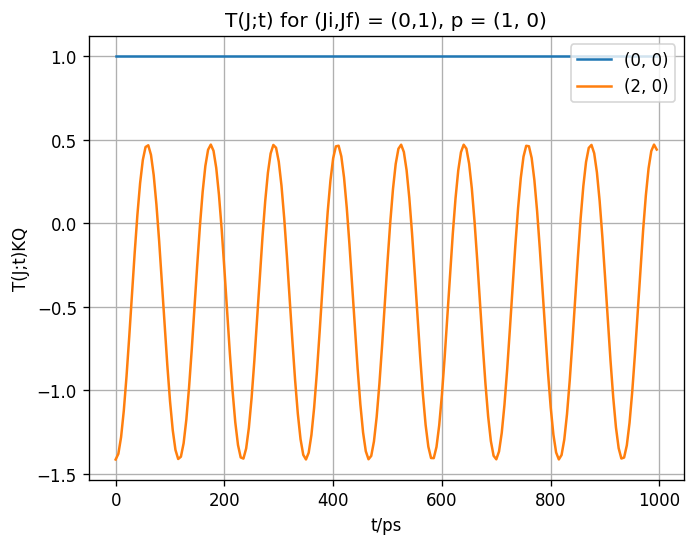

In [3]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set t-axis, in ps
tIn = np.arange(0,1000,5)*1e-12

# Define intial & photon states
Ji = 0  # Initial |J>
p = (1,0)   # Coupling (photon) |1,q>

# Set final state parameters by isotope
JFlist = JF129
Jf = np.int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)
print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

The dynamics show the expected, simple, quantum beat structure in
the $\langle T(J;t)_{KQ}^{\dagger}\rangle$. For 1-photon excitation,
with linearly polarised light, only $K=0,\,2,\,Q=0$ terms contribute.
The $(0,0)$ term reflects the total population, hence is temporally-invariant,
while the $(2,0)$ term shows the changing alignment as the wavepacket
evolves. 

The allowed terms, and phase of the quantum beats, depends on the transition - i.e. initial and final $J$ state, and photon angular momentum. For example, with circularly polarised light $M_p = +1$, terms with $K=1$ are also allowed, and are out-of-phase with $K=2$ terms.

### $^{131}Xe$ ###

[[ 0.          0.          0.19245009]
 [ 1.          0.         -0.23570226]
 [ 2.          0.          0.13608276]]


/tmp/ipykernel_68371/4154865883.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Jf = np.int(JFlist[0][0]) # Final state J
/tmp/ipykernel_68371/4154865883.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Num

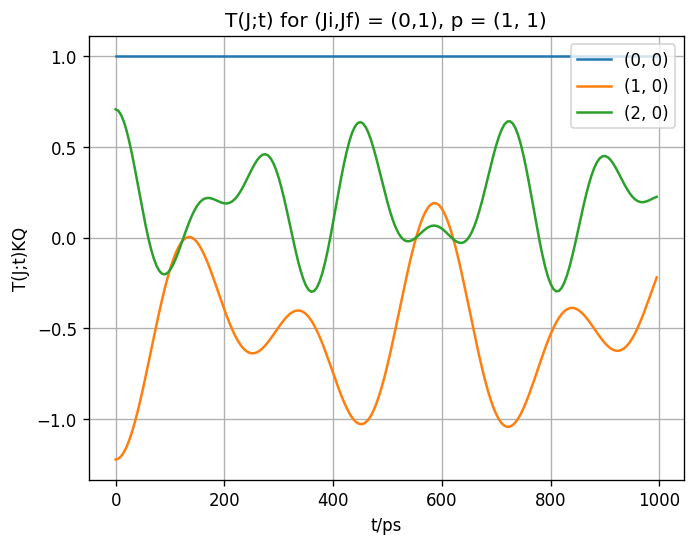

In [11]:
# Calculate 1-photon abs. and hyperfine wavepacket evolution

# Set final state parameters by isotope
JFlist = JF131
Jf = np.int(JFlist[0][0]) # Final state J

# Calculate T(J)KQ following 1-photon abs.
TKQ = TKQpmm(Jf,Jf, Ji = Ji, p = p)

print(TKQ)

# Calculate T(J;t)KQ
TJt = TJtKQ(JFlist,TKQ,tIn)

# Plot with legend, label by (K,Q) values
norm = TJt[0,0]  # Optional normalisation by T(0,0) (population) term
plt.figure(dpi=120)
for n in range(0,TJt.shape[0],1):
    plt.plot(tIn/1e-12,TJt[n][:]/norm, label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1]))))

plt.legend(loc='upper right')
plt.title('T(J;t) for (Ji,Jf) = ({0},{1}), p = {2}'.format(Ji,Jf,p))
plt.xlabel('t/ps')
plt.ylabel('T(J;t)KQ')
plt.grid(True)
plt.show()

## Read experimental data and plot vs. TKQ

In [15]:
# TO FIX: this should be identical, but gives slightly different plots - possibly complex/real/abs confusion?

from epsproc import IO
from pathlib import Path

dataPath = Path('/tmp/xe_analysis')
dataTypes = ['BLMall', 'BLMerr', 'BLMerrCycle']   # Read these types, should just do dir scan here.

# Read from HDF5/NetCDF files
dataDict = {}
for item in dataTypes:
    dataDict[item] = IO.readXarray(fileName=f'Xe_dataset_{item}.nc', filePath=dataPath.as_posix()).real
    dataDict[item].name = item

*** Read /tmp/xe_analysis/Xe_dataset_BLMall.nc.
*** Read /tmp/xe_analysis/Xe_dataset_BLMerr.nc.
*** Read /tmp/xe_analysis/Xe_dataset_BLMerrCycle.nc.


In [13]:
from qbanalysis.dataset import loadFinalDataset
dataDict = loadFinalDataset(dataPath)

2024-06-06 15:29:27.023 | INFO     | qbanalysis.dataset:loadDataset:150 - Loaded data cpBasex_results_cycleSummed_rot90_quad1_ROI_results_with_FT_NFFT1024_hanningWindow_270717.mat.
2024-06-06 15:29:27.072 | INFO     | qbanalysis.dataset:loadDataset:150 - Loaded data cpBasex_results_allCycles_ROIs_with_FTs_NFFT1024_hanningWindow_270717.mat.
2024-06-06 15:29:27.386 | INFO     | qbanalysis.dataset:loadFinalDataset:132 - Processed data to Xarray OK.


In [16]:
from qbanalysis.plots import plotFinalDatasetBLMt
hvData = plotFinalDatasetBLMt(**dataDict)

In [ ]:
# TODO - setup XR/HV dataset to match calcs...
# tIn/1e-12,TJt[n][:]/norm
# , label=str((np.int(TKQ[n][0]), np.int(TKQ[n][1])))